# 3 - Monte Carlo Integration (I)

##### Imports:

In [38]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import statistics 
from scipy import stats
import time

##### Configure matplotlib settings

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     "font.serif": "Modern Roman",
     "figure.figsize": (10, 8),
     "axes.titlesize" : 26,
     "axes.labelsize" : 28,
     "lines.linewidth": 3,
     "lines.markersize" : 10,
     "legend.fontsize":20,
     "xtick.labelsize" : 24,
     "ytick.labelsize" : 24})

##### Functions:

In [3]:
def g(x, y, z):
    return (x + y + z)**2

Store the exact value of the integral, and define a function which will help in our plots.

In [4]:
exact = 3*(2*np.pi)**1.5

In [5]:
exact

47.24882983716726

In [6]:
def exact_vector(length):
    return np.array([exact for i in range(length)])

In [7]:
def approximate_integral(npts, nrep):
    '''Approximates the integral using the Monte Carlo method from the course notes'''
    I = []
    for k in range(nrep):
        s = 0
        for i in range(npts):
            x = random.gauss(0,1); y = random.gauss(0,1); z = random.gauss(0,1);
            s += g(x, y, z)
        I.append(s*(2*np.pi)**1.5/npts)
    return I

## 3.2 - Numerical approximation of the integral

Approximate the integral: you can play around with npts and nrep to get a better approximation.

In [89]:
# Number of points per run: npts, Number of replicas: nrep
npts=8000; nrep=100;
I = approximate_integral(npts, nrep)

In [90]:
print(np.mean(I))

47.34970153308611


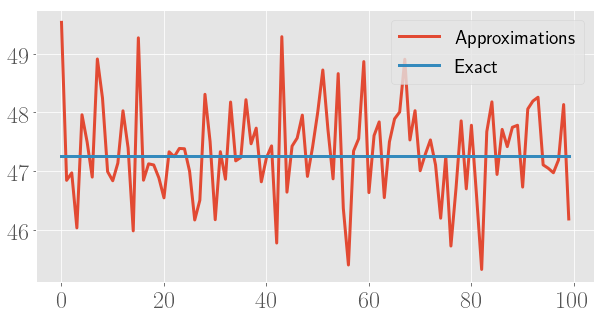

Approximation of the integral is 47.3497, the exact value is 47.2488, so there is a difference of 0.1009. The relative fluct. is 0.0171


In [92]:
plt.subplots(figsize =  (10,5))
plt.plot(I, label = "Approximations") 
plt.plot(exact_vector(len(I)), label = "Exact")
plt.legend()
plt.savefig("ex3_approximation_integral.pdf", bbox_inches = 'tight')
plt.show()

print("Approximation of the integral is %0.4f, the exact value is %0.4f, so there is a difference of %0.4f. The relative fluct. is %0.4f" %(np.mean(I), exact, abs(exact - np.mean(I)), np.std(I)/np.mean(I)) )

## 2.3 - Variances

In [12]:
npts_list = np.arange(50, 6000, 50)

Warning: The following command block takes a bit of time... About 90 seconds on average

In [80]:
nrep = 100
var = []
inverse_var = []

start = time.time()
for npts in npts_list:
    I = approximate_integral(npts, nrep)
    value = np.var(I)/np.mean(I)
    
    var.append(value)
    inverse_var.append(1/value)
    
end = time.time()
print("Elapsed time was ", end - start, " seconds.")

Elapsed time was  88.39381694793701  seconds.


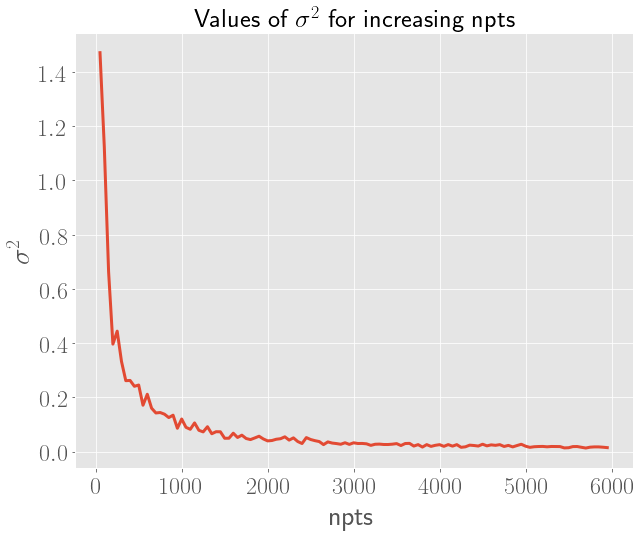

In [81]:
plt.plot(npts_list, var, label = r"$\sigma^2$")
#plt.legend()
plt.title(r'Values of $\sigma^2$ for increasing npts')
plt.xlabel(r'npts')
plt.ylabel(r'$\sigma^2$')
plt.savefig('ex3_variances.pdf', bbox_inches = 'tight')
plt.show()

In [84]:
slope, intercept, r_value, p_value, std_err = stats.linregress(npts_list, inverse_var)
print('The coefficient of determination for the fit is equal to %0.4f. The slope is %0.4f and the intercept is %0.4f' %(r_value**2, slope, intercept))

The coefficient of determination for the fit is equal to 0.9171. The slope is 0.0109 and the intercept is -0.0644


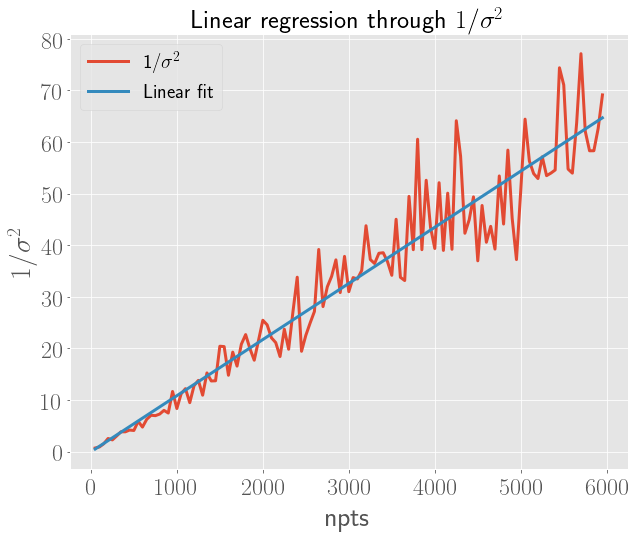

In [83]:
plt.plot(npts_list, inverse_var, label = r"1/$\sigma^2$")
t = np.arange (npts_list[0], npts_list[-1], 1)
y = slope*t + intercept
plt.plot(t, y, label = "Linear fit")
plt.xlabel(r'npts')
plt.ylabel(r'$1/\sigma^2$')
plt.title(r'Linear regression through $1/\sigma^2$')
plt.legend()
plt.savefig("ex3_regression.pdf", bbox_inches = 'tight')
plt.show()